In [1]:
import os
os.chdir("../")

In [2]:
import warnings
import numpy as np
import jax.numpy as jnp
from scipy import signal

import matplotlib.pyplot as plt
from matplotlib import rcParams as rc
configs = {
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    # 'font.sans-serif': ['Microsoft YaHei', 'SimHei', 'Arial', 'Liberation Sans', 'sans-serif'],
    'font.sans-serif': ['Palatino Linotype', 'Microsoft YaHei', 'SimHei', 'Arial', 'Liberation Sans', 'sans-serif'],
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'mathtext.fontset': "cm",
    # 'mathtext.rm': "asana math",
    # 'mathtext.cal': "asana math",
    "font.size": 16,
    # 'axes.labelsize': 'large',
    # 'axes.labelpad': 8.0,
    # 'xtick.major.pad': 9.0,
}
rc.update(configs)


import matplotlib.font_manager
font_path = "/home/nanxi/.local/share/fonts/Palatino-Linotype-Regular.ttf"
if os.path.exists(font_path):
    matplotlib.font_manager.fontManager.addfont(font_path)
    prop = matplotlib.font_manager.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = prop.get_name()
    print(f"Set font to {prop.get_name()}")

Set font to Palatino Linotype


In [4]:
import pandas as pd
df_jax = pd.read_csv("benchmark_results/batch_benchmark_jax_batched.txt").to_numpy()
df_torch = pd.read_csv("benchmark_results/batch_benchmark_torch_batched.txt").to_numpy()
df_numpy = pd.read_csv("benchmark_results/batch_benchmark_numpy_batched.txt").to_numpy()

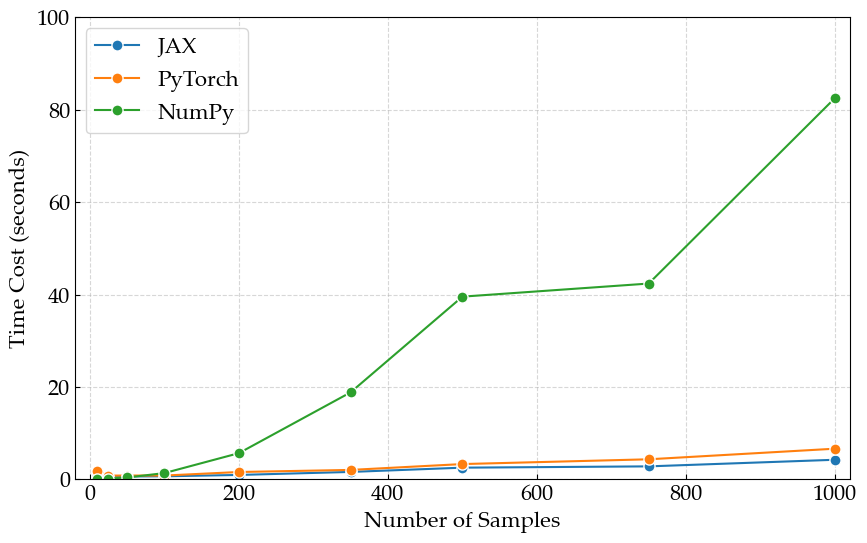

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_jax[:, 0], df_jax[:, 1], label="JAX", marker='o', markeredgecolor='white', markersize=8)
ax.plot(df_torch[:, 0], df_torch[:, 1], label="PyTorch", marker='o', markeredgecolor='white', markersize=8)
ax.plot(df_numpy[:, 0], df_numpy[:, 1], label="NumPy", marker='o', markeredgecolor='white', markersize=8)
ax.set(
    xlabel="Number of Samples",
    ylabel="Time Cost (seconds)",
    # title="Time Cost Comparison: JAX vs PyTorch vs NumPy",
)
ax.set_xlim(-20, 1020)
ax.set_ylim(0, 100)
ax.legend()
plt.savefig("./img/time_cost_comparison.png", dpi=300, bbox_inches='tight')